## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns
from google.colab import files

## Download & Load dataset
### Datasets downloaded from kaggle https://www.kaggle.com/hgultekin/bbcnewsarchive



In [2]:
uploaded = files.upload()

Saving bbc-news-data.csv to bbc-news-data.csv


In [3]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')

print(f'Jumlah datasets: {len(df)}')
df

Jumlah datasets: 2225


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [4]:
# delete columns (unused column)
df = df.drop(columns=['filename'])
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


[Text(0, 0, '510'),
 Text(0, 0, '386'),
 Text(0, 0, '417'),
 Text(0, 0, '511'),
 Text(0, 0, '401')]

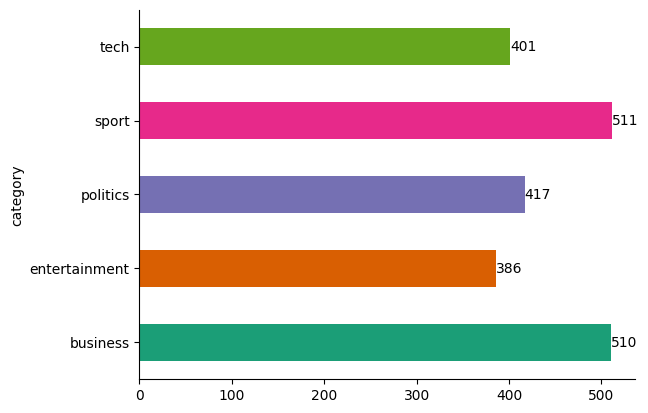

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
ax = df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
ax.bar_label(ax.containers[0], fontsize=10)

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   title     2225 non-null   object
 2   content   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


## Data Cleansing


*   Lower-case all characters
*   Removing punctuation
*   Removing number
*   Remove stopwords
*   Do lemmatization








In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stopword = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
df_new = df.copy()

# lower-case all characters
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.content = df_new.content.apply(lambda x: x.lower())

# removing punctuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

## lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['content'].apply(rem_numbers)

# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.title = df_new.title.apply(lambda x: stopword(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

In [9]:
df_new.head()

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


## Encoding The Category

In [10]:
# data category one-hot-encoding
category = pd.get_dummies(df_new.category)
df_new_cat = pd.concat([df_new, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')
df_new_cat

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,bt program to beat dialler scams,bt is introducing two initiatives to help bea...,0,0,0,0,1
2221,spam e-mails tempt net shoppers,computer users across the world continue to i...,0,0,0,0,1
2222,be careful how you code,a new european directive could put software w...,0,0,0,0,1
2223,us cyber security chief resigns,the man making sure us computer networks are ...,0,0,0,0,1


## Splitting Data

In [11]:
# change dataframe value to numpy array
X = df_new_cat['title'].values + '' + df_new_cat['content'].values
y = df_new_cat[['business',
                'entertainment',
                'politics',
                'sport',
                'tech']].values

In [12]:
# Split data into training and validation (80% : 20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state= 42,
                                                    test_size=0.2,
                                                    shuffle=True)

print("Total data train: ", len(y_train))
print("Total data test: ", len(y_test))

Total data train:  1780
Total data test:  445


## Tokenizer

In [13]:
# Tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(X_train_seq)
padded_test = pad_sequences(X_test_seq)


print(f'length of words: {len(word_index)}')

length of words: 32673


## Modelling

In [14]:
# callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [15]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 435973 (1.66 MB)
Trainable params: 435973 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
num_epochs = 50
history = model.fit(padded_train, y_train, epochs=num_epochs,
                    validation_data=(padded_test, y_test),
                    callbacks=[callbacks], verbose=2, validation_steps=30)

Epoch 1/50
56/56 - 24s - loss: 1.5759 - accuracy: 0.2702 - val_loss: 1.3599 - val_accuracy: 0.4652 - 24s/epoch - 421ms/step
Epoch 2/50
56/56 - 14s - loss: 1.1371 - accuracy: 0.4489 - val_loss: 1.1098 - val_accuracy: 0.4697 - 14s/epoch - 258ms/step
Epoch 3/50
56/56 - 13s - loss: 0.9712 - accuracy: 0.5034 - val_loss: 1.0248 - val_accuracy: 0.6135 - 13s/epoch - 236ms/step
Epoch 4/50
56/56 - 14s - loss: 0.5748 - accuracy: 0.8230 - val_loss: 0.5715 - val_accuracy: 0.8022 - 14s/epoch - 252ms/step
Epoch 5/50
56/56 - 13s - loss: 0.2668 - accuracy: 0.9202 - val_loss: 0.8098 - val_accuracy: 0.6652 - 13s/epoch - 234ms/step
Epoch 6/50
56/56 - 11s - loss: 0.1796 - accuracy: 0.9483 - val_loss: 0.6721 - val_accuracy: 0.7843 - 11s/epoch - 202ms/step
Epoch 7/50
56/56 - 11s - loss: 0.0498 - accuracy: 0.9888 - val_loss: 0.6199 - val_accuracy: 0.7978 - 11s/epoch - 205ms/step
Epoch 8/50
56/56 - 11s - loss: 0.0221 - accuracy: 0.9949 - val_loss: 0.6039 - val_accuracy: 0.8607 - 11s/epoch - 203ms/step
Epoch 9/

## Plotting

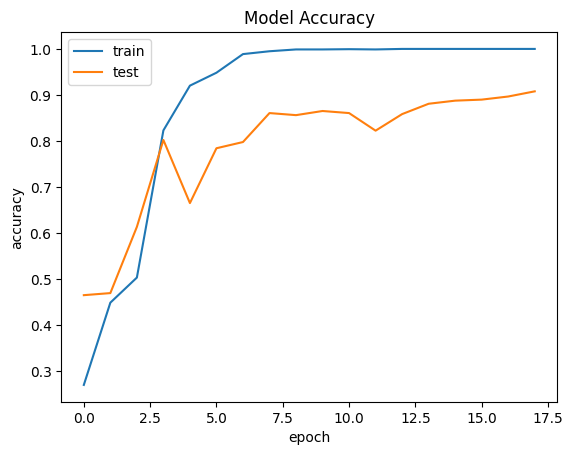

In [17]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

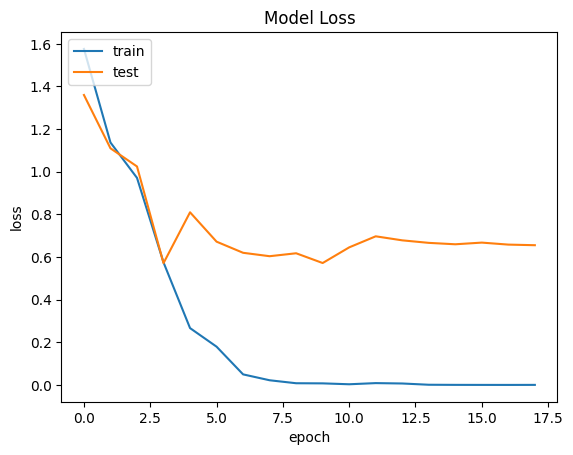

In [18]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Classification Report

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

train_prediction = np.argmax(model.predict(padded_train), axis=1)
test_prediction = np.argmax(model.predict(padded_test), axis=1)

print("Accuracy data train : ", accuracy_score(train_prediction,
                                               np.argmax(y_train, axis=1)))
print("Accuracy data test : ", accuracy_score(test_prediction,
                                              np.argmax(y_test, axis=1)))

print()

print("Classification Report")
print(classification_report(test_prediction, np.argmax(y_test, axis=1), target_names=['Business', 'Entertaintment', 'Politics', 'Sport', 'Tech']))

print("Confussion Matrix")
print(confusion_matrix(test_prediction, np.argmax(y_test, axis=1)))

14/14 [==============================] - 1s 55ms/step
Accuracy data train :  1.0
Accuracy data test :  0.9078651685393259

Classification Report
                precision    recall  f1-score   support

      Business       0.93      0.91      0.92       118
Entertaintment       0.92      0.92      0.92        72
      Politics       0.83      0.86      0.85        73
         Sport       0.98      0.98      0.98       102
          Tech       0.85      0.85      0.85        80

      accuracy                           0.91       445
     macro avg       0.90      0.90      0.90       445
  weighted avg       0.91      0.91      0.91       445

Confussion Matrix
[[107   1   5   1   4]
 [  0  66   1   1   4]
 [  4   2  63   0   4]
 [  0   2   0 100   0]
 [  4   1   7   0  68]]
